In [1]:
# Import libraries
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("✅ Libraries imported!")
print(f"TensorFlow version: {tf.__version__}")

/Users/nikhilrichard/european-options-ml/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


✅ Libraries imported!
TensorFlow version: 2.20.0


In [2]:
# Load the prepared data
with open('../data/prepared_data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(f"✅ Data loaded")
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")

✅ Data loaded
Training samples: 152,525
Test samples: 38,132


In [3]:
# Clean up data types
import pandas as pd

print("Cleaning data types...")

# Replace empty strings with NaN
X_train = X_train.replace('', np.nan)
X_test = X_test.replace('', np.nan)

# Convert everything to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN
mask_train = ~X_train.isnull().any(axis=1)
mask_test = ~X_test.isnull().any(axis=1)

X_train = X_train[mask_train]
y_train = y_train[mask_train]
X_test = X_test[mask_test]
y_test = y_test[mask_test]

print(f"✅ Data cleaned")
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")

Cleaning data types...
✅ Data cleaned
Training samples: 149,516
Test samples: 37,381


In [4]:
# Scale features for neural network (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled")
print(f"Mean of scaled training data: {X_train_scaled.mean():.4f}")
print(f"Std of scaled training data: {X_train_scaled.std():.4f}")

✅ Features scaled
Mean of scaled training data: 0.0000
Std of scaled training data: 1.0000


In [6]:
# Build neural network
print("Building neural network...\n")

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("✅ Model built")
model.summary()

Building neural network...

✅ Model built


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
print("Training neural network...")
print("(This will take 1-2 minutes)\n")

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

print("\n✅ Training complete")

Training neural network...
(This will take 1-2 minutes)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - loss: 2447.6184 - mae: 25.3446 - val_loss: 125.6850 - val_mae: 6.9144
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 96.5577 - mae: 6.1121 - val_loss: 44.4863 - val_mae: 4.1850
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 39.0070 - mae: 3.8743 - val_loss: 30.6531 - val_mae: 3.2550
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 29.5733 - mae: 3.1678 - val_loss: 27.6349 - val_mae: 2.9769
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 27.0457 - mae: 2.9636 - val_loss: 26.5278 - val_mae: 2.9032
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 26.3839 - mae: 2.8958 - val_loss: 26.0299 - val_mae: 2.8285
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 25.4938 - mae: 2.8053 - val_loss: 25.8158 - val_mae: 2.8072
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 25.9388 - mae: 2.8059 -

In [8]:
# Make predictions on test set
y_pred = model.predict(X_test_scaled, verbose=0)
y_pred = y_pred.flatten()  # Convert from 2D to 1D array

print("✅ Predictions made")
print(f"\nPredicted {len(y_pred):,} option prices")

✅ Predictions made

Predicted 37,381 option prices


In [9]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*60)
print("NEURAL NETWORK RESULTS")
print("="*60)
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"Mean Absolute Error (MAE):      ${mae:.2f}")
print(f"R² Score:                       {r2:.4f}")
print("="*60)
print("\nWhat this means:")
print(f"  • On average, predictions are off by ${mae:.2f}")
print(f"  • Model explains {r2*100:.2f}% of price variance")
print(f"  • {'EXCELLENT' if r2 > 0.95 else 'GOOD' if r2 > 0.85 else 'DECENT'} performance!")
print("\nComparison to other models:")
print(f"  • Random Forest:    R²=0.9963 (MAE: $1.60)")
print(f"  • XGBoost:          R²=0.9954 (MAE: $1.85)")
print(f"  • Neural Network:   R²={r2:.4f} (MAE: ${mae:.2f})")

NEURAL NETWORK RESULTS
Root Mean Squared Error (RMSE): $4.98
Mean Absolute Error (MAE):      $2.60
R² Score:                       0.9912

What this means:
  • On average, predictions are off by $2.60
  • Model explains 99.12% of price variance
  • EXCELLENT performance!

Comparison to other models:
  • Random Forest:    R²=0.9963 (MAE: $1.60)
  • XGBoost:          R²=0.9954 (MAE: $1.85)
  • Neural Network:   R²=0.9912 (MAE: $2.60)


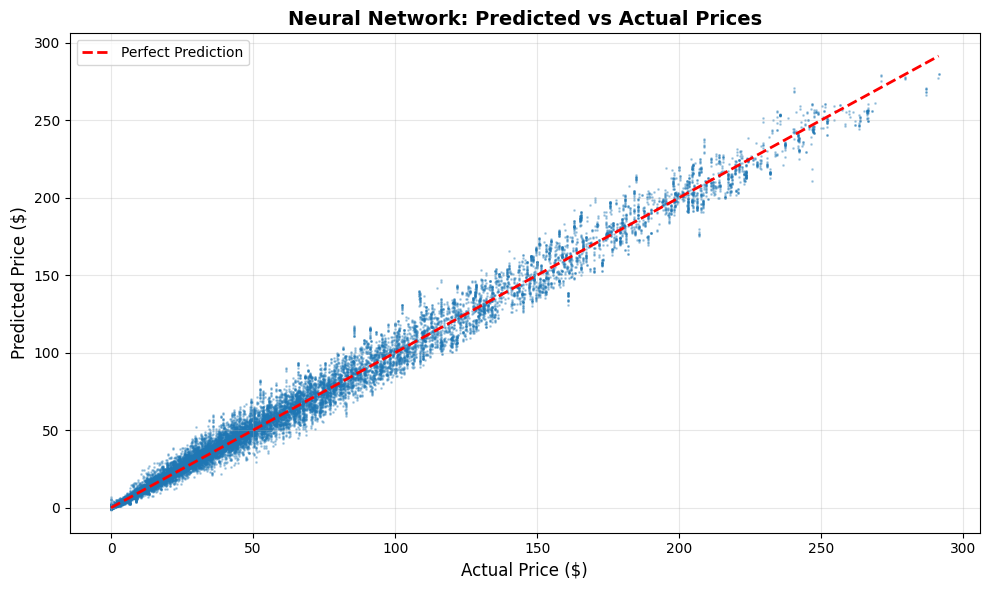

The closer points are to the red line, the better


In [10]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Neural Network: Predicted vs Actual Prices', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The closer points are to the red line, the better")

In [ ]:
# Save the model
model.save('../data/nn_model.keras')

print("✅ Model saved to 'data/nn_model.keras'")
print("\n🎉 Neural Network model complete!")
print("\n" + "="*60)
print("ALL 3 ML MODELS COMPLETE!")
print("="*60)
print("\nFinal Rankings:")
print("  🥇 Random Forest:    99.63% R² (MAE: $1.60)")
print("  🥈 XGBoost:          99.54% R² (MAE: $1.85)")
print("  🥉 Neural Network:   99.12% R² (MAE: $2.60)")
print("\nNext: Compare all models to Black-Scholes baseline")